In [ ]:
"ms_stim_difference",
            {
                "artifact_detection_algorithm": "difference",
                "artifact_detection_algorithm_params": {
                    "amplitude_thresh_1st": 500,  # must be None or >= 0
                    "proportion_above_thresh_1st": 0.1,
                    "amplitude_thresh_2nd": 1000,  # must be None or >= 0
                    "proportion_above_thresh_2nd": 0.05,
                    "removal_window_ms": 10.0,  # in milliseconds
                    "local_window_ms": 40.0,  # in milliseconds
                },
                "referencing":
            },

In [11]:
%load_ext autoreload
%autoreload 2
from spyglass.lfp.v1 import LFPArtifactDetection, LFPArtifactDetectionSelection, LFPArtifactDetectionParameters, LFPV1

LFPArtifactDetection()
LFPArtifactDetectionParameters().fetch("artifact_params")[0]

LFPArtifactDetectionSelection()

key_list = []
for animal in ['Winnie',"Wallie","Yoshi","Totoro","Olive","Dan","Odin","Frodo","Sam","Banner"]:
       for artifact_key in (LFPV1 & f"nwb_file_name LIKE '{animal}%'").fetch("KEY",as_dict = True):
              artifact_key['artifact_params_name'] = 'default_difference'
              LFPArtifactDetectionSelection().insert1(artifact_key,skip_duplicates=True)
              key_list.append(artifact_key)
              # break
       # break
LFPArtifactDetection.populate(key_list,processes=16)
              
              
# key = {"nwb_file_name":"Winnie20220713_.nwb",
#        "target_interval_list_name":"pos 1 valid times"}
# artifact_key = (LFPV1() & key).fetch("KEY",as_dict = True)[0]
# artifact_key['artifact_params_name'] = 'default_difference_ref'
# LFPArtifactDetectionSelection().insert1(artifact_key,skip_duplicates=True)
# LFPArtifactDetectionSelection & artifact_key
# LFPArtifactDetection.populate(artifact_key)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
basic_key = {'nwb_file_name': 'Wallie20220912_.nwb',
 'target_interval_list_name': 'pos 0 valid times'}
basic_key = "nwb_file_name LIKE 'Bilbo%'"#{'nwb_file_name': 'Bilbo20230724_.nwb',
#  'target_interval_list_name': 'pos 0 valid times'
#  }
# {'nwb_file_name': 'Bilbo20230724_.nwb',
#  'target_interval_list_name': 'pos 0 valid times'}

key_list = []
for artifact_key in (LFPV1 & basic_key).fetch("KEY",as_dict = True):
    print(artifact_key)
    artifact_key['artifact_params_name'] = 'default_difference'
    LFPArtifactDetectionSelection().insert1(artifact_key,skip_duplicates=True)
    key_list.append(artifact_key)
LFPArtifactDetection.populate(key_list,processes=16)   
LFPArtifactDetection & key_list         

{'nwb_file_name': 'Bilbo20230722_.nwb', 'lfp_electrode_group_name': 'tetrode_sample_Bilbo', 'target_interval_list_name': 'pos 0 valid times', 'filter_name': 'LFP 0-400 Hz', 'filter_sampling_rate': 30000}
{'nwb_file_name': 'Bilbo20230722_.nwb', 'lfp_electrode_group_name': 'tetrode_sample_Bilbo', 'target_interval_list_name': 'pos 1 valid times', 'filter_name': 'LFP 0-400 Hz', 'filter_sampling_rate': 30000}
{'nwb_file_name': 'Bilbo20230722_.nwb', 'lfp_electrode_group_name': 'tetrode_sample_Bilbo', 'target_interval_list_name': 'pos 2 valid times', 'filter_name': 'LFP 0-400 Hz', 'filter_sampling_rate': 30000}
{'nwb_file_name': 'Bilbo20230722_.nwb', 'lfp_electrode_group_name': 'tetrode_sample_Bilbo', 'target_interval_list_name': 'pos 3 valid times', 'filter_name': 'LFP 0-400 Hz', 'filter_sampling_rate': 30000}
{'nwb_file_name': 'Bilbo20230722_.nwb', 'lfp_electrode_group_name': 'tetrode_sample_Bilbo', 'target_interval_list_name': 'pos 4 valid times', 'filter_name': 'LFP 0-400 Hz', 'filter_sam

--- Logging error ---
Traceback (most recent call last):
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/s

nwb_file_name name of the NWB file,lfp_electrode_group_name the name of this group of electrodes,target_interval_list_name descriptive name of this interval list,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,artifact_params_name,artifact_times np array of artifact intervals,artifact_removed_valid_times np array of valid no-artifact intervals,artifact_removed_interval_list_name name of the array of no-artifact valid time intervals
Bilbo20230722_.nwb,tetrode_sample_Bilbo,pos 0 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230722_.nwb_pos 0 valid times_LFP_default_difference
Bilbo20230722_.nwb,tetrode_sample_Bilbo,pos 1 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230722_.nwb_pos 1 valid times_LFP_default_difference
Bilbo20230722_.nwb,tetrode_sample_Bilbo,pos 2 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230722_.nwb_pos 2 valid times_LFP_default_difference
Bilbo20230722_.nwb,tetrode_sample_Bilbo,pos 3 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230722_.nwb_pos 3 valid times_LFP_default_difference
Bilbo20230722_.nwb,tetrode_sample_Bilbo,pos 4 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230722_.nwb_pos 4 valid times_LFP_default_difference
Bilbo20230724_.nwb,tetrode_sample_Bilbo,pos 0 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230724_.nwb_pos 0 valid times_LFP_default_difference
Bilbo20230724_.nwb,tetrode_sample_Bilbo,pos 1 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230724_.nwb_pos 1 valid times_LFP_default_difference
Bilbo20230724_.nwb,tetrode_sample_Bilbo,pos 10 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230724_.nwb_pos 10 valid times_LFP_default_difference
Bilbo20230724_.nwb,tetrode_sample_Bilbo,pos 11 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230724_.nwb_pos 11 valid times_LFP_default_difference
Bilbo20230724_.nwb,tetrode_sample_Bilbo,pos 12 valid times,LFP 0-400 Hz,30000,default_difference,=BLOB=,=BLOB=,Bilbo20230724_.nwb_pos 12 valid times_LFP_default_difference


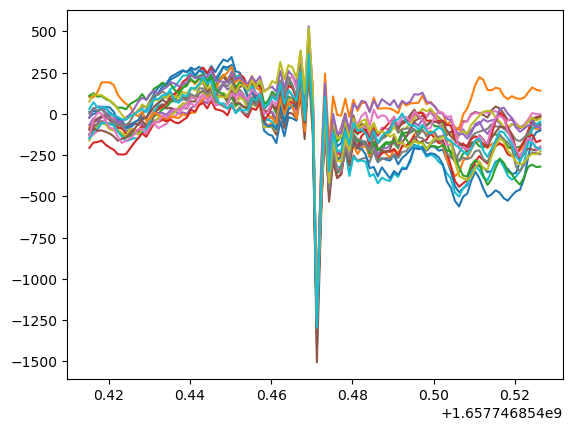

In [53]:
# (LFPArtifactDetectionParameters).fetch()[3]
import numpy as np
import matplotlib.pyplot as plt
artifacts = (LFPArtifactDetection&artifact_key).fetch('artifact_times')[0]

lfp_df = (LFPV1()&key).fetch1_dataframe()
i = 40

ind = np.logical_and(lfp_df.index>artifacts[i][0]-.05,lfp_df.index<artifacts[i][1]+.05)

for j in range (20):
    plt.plot(lfp_df[ind].index,lfp_df[ind][j])




In [ ]:
from spyglass.ripple.v1 import R

In [55]:
from spyglass.lfp.analysis.v1 import LFPBandV1
LFPBandV1()

lfp_merge_id,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,nwb_file_name name of the NWB file,target_interval_list_name descriptive name of this interval list,lfp_band_sampling_rate the sampling rate for this band,analysis_file_name name of the file,interval_list_name descriptive name of this interval list,lfp_band_object_id the NWB object ID for loading this object from the file
001d08a1-5365-3c20-716b-f431ab136a55,Theta 5-11 Hz,1000,Totoro20220602_.nwb,pos 4 valid times,100,Totoro20220602_00EKNDX0TI.nwb,pos 4 valid times lfp band 100Hz,70d69637-b7d8-435b-b869-96e46ae57ad0
00213375-550b-ae22-394b-82da3cdfddb3,Theta 5-11 Hz,1000,Yoshi20220518_.nwb,pos 15 valid times,100,Yoshi20220518_6MTJQLGWOJ.nwb,pos 15 valid times lfp band 100Hz,36efbec9-18ec-40ac-9921-5538960b9fc3
004560d5-417b-ff99-5a13-99a37a3eb998,ripple_150_250,1000,j1620210715_.nwb,09_s5,1000,j1620210715_2NU0XNAZQ8.nwb,09_s5 lfp band 1000Hz,40a2ff51-aa7e-4862-80a2-b7764d1b5d2d
004560d5-417b-ff99-5a13-99a37a3eb998,theta_5_11,1000,j1620210715_.nwb,09_s5,1000,j1620210715_RPBF9OHXZP.nwb,09_s5 lfp band 1000Hz,f1ac437f-b9b4-486f-8d6e-af7c3bf1f4ee
006b9516-88d1-dd58-75e6-e519fb7dfea8,ripple_150_250,1000,senor20201103_.nwb,15_s8,1000,senor20201103_ADZYWIATJ2.nwb,15_s8 lfp band 1000Hz,0ce4572b-ab3c-4eed-a1e4-702e48c646f1
006b9516-88d1-dd58-75e6-e519fb7dfea8,theta_5_11,1000,senor20201103_.nwb,15_s8,1000,senor20201103_2799TRAUKB.nwb,15_s8 lfp band 1000Hz,5bb8e235-7637-4074-81c7-98c4293b5a04
0087e094-8238-32b8-9e8d-ecb7d9352b3b,Fast Gamma 65-100 Hz,1000,Winnie20220714_.nwb,pos 9 valid times,1000,Winnie20220714_W0ZL6X8EGX.nwb,pos 9 valid times lfp band 1000Hz,d2d0e31a-9023-46a5-b4e0-28a8ad315cb2
0087e094-8238-32b8-9e8d-ecb7d9352b3b,ms_stim_125ms_period,1000,Winnie20220714_.nwb,pos 9 valid times,200,Winnie20220714_C3LMCTPHIB.nwb,pos 9 valid times lfp band 200Hz,455474dd-0a9f-455a-82d1-3c5f9cfa4527
0087e094-8238-32b8-9e8d-ecb7d9352b3b,Ripple 150-250 Hz,1000,Winnie20220714_.nwb,pos 9 valid times,1000,Winnie20220714_5LQ6MZHXP4.nwb,pos 9 valid times lfp band 1000Hz,0d378b3d-567a-47be-9941-e1654bd778b1
0087e094-8238-32b8-9e8d-ecb7d9352b3b,Slow Gamma 25-55 Hz,1000,Winnie20220714_.nwb,pos 9 valid times,1000,Winnie20220714_M4VRB4495E.nwb,pos 9 valid times lfp band 1000Hz,c93c64f1-74cd-4217-a2ed-4492948e9937
